## Load Packages and Data

In [2]:
import numpy as np
import scipy.optimize as opt
import scipy.stats as sts
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl

plt.style.use("ggplot")
%matplotlib inline

In [3]:
incomes = np.loadtxt('incomes.txt')
sick = pd.read_csv("sick.txt")
inc_sim = np.linspace(0.01, 150000, 200)

sigma_init = 0.5
mu_init = 11

### a) Make a histogram

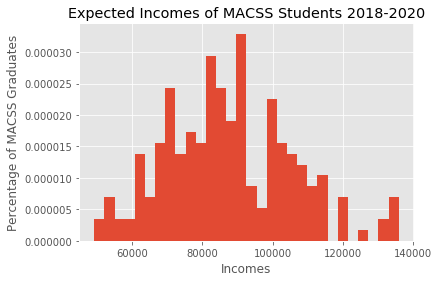

In [4]:
plt.hist(incomes, bins = 30, normed = True)
plt.title("Expected Incomes of MACSS Students 2018-2020")
plt.xlabel("Incomes")
plt.ylabel("Percentage of MACSS Graduates")

### b) Plot the lognormal PDF

In [24]:
def log_norm_pdf(xvals, mu, sigma, cutoff):
    
    prob_notcut = sts.lognorm.cdf(cutoff, s=sigma, loc=mu, scale=np.exp(mu)) # use lognormal CDF function
            
    pdf_vals = ((1/(xvals * sigma * np.sqrt(2 * np.pi)) *
                    np.exp( - (np.log(xvals) - mu)**2 / (2 * sigma**2))) / prob_notcut) # log normal distribution function 
    
    return pdf_vals 

In [25]:
def log_lik_norm(xvals, mu, sigma, cutoff):
   
    pdf_vals = log_norm_pdf(xvals, mu, sigma, cutoff) # get pdf values
    ln_pdf_vals = np.log(pdf_vals) # take log of the pdf values
    log_lik_val = ln_pdf_vals.sum() # sum the logs
   
    return log_lik_val # get the log likelihood value

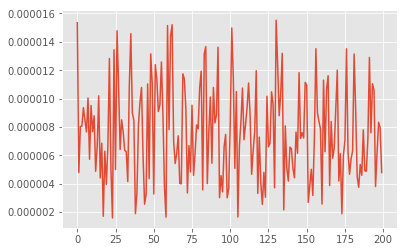

In [26]:
income_lognorm = log_norm_pdf(incomes, mu_init, sig_init, 150000)
plt.plot(income_lognorm)

### c) Estimate the parameters of the lognormal distribution by maximum likelihood

In [15]:
def log(x,mu,sigma):
    temp = -pow((np.log(x)-mu),2)/2/pow(sigma,2)
    y = 1/(x*sigma*np.sqrt(2*np.pi)) * np.exp(temp)
    return y

def loglike(params,*args):
    mu, sigma = params
    x = args
    neg_log = -np.sum(log(incomes, mu, sigma))
    return neg_log
                      

In [16]:
mu_init = 11
sig_init = 0.5
params_init = [mu_init, sig_init]
results = opt.minimize(loglike, params_init, args = incomes, method='L-BFGS-B',bounds=((None, None),(1e-10, None)))
results
mu_fitted, sig_fitted = results.x
print('Fitted mu is {:.2f}, fitted sigma is {:.4f}'.format(mu_fitted,sig_fitted))

Fitted mu is 11.02, fitted sigma is 0.0000


### d) Likelihood Ratio Test

In [17]:
log_lik_h0 = -loglike([mu_init,sigma_init],incomes)
log_lik_mle = -loglike([mu_fitted, sig_fitted],incomes)
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

chi squared of H0 with 2 degrees of freedom p-value =  0.00401377855853


# Question 2 - Linear Regression and MLE

In [18]:
def crit(params):
    b0, b1, b2, b3, var = params
    err = sick.sick - b0 - b1*sick.age - b2*sick.children - b3*sick.avgtemp_winter
    neg_log = - np.sum(sts.norm.pdf(err,0,np.sqrt(var)))
    return(neg_log)

pa_in = np.random.randint(0,3,5)
opt.minimize(crit, [1,0.01,0,0,0.01])

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:872: RuntimeWarning: invalid value encountered in greater_equal
  return (self.a <= x) & (x <= self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:872: RuntimeWarning: invalid value encountered in less_equal
  return (self.a <= x) & (x <= self.b)
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:872: RuntimeWarning: invalid value encountered in greater_equal
  return (self.a <= x) & (x <= self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:872: RuntimeWarning: invalid value encountered in less_equal
  return (self.a <= x) & (x

      fun: nan
 hess_inv: array([[ 1.01277522, -0.31032828, -0.05529062,  0.34292659,  0.16451871],
       [-0.31032828,  6.43604187,  1.07019824, -7.32233188, -2.18448709],
       [-0.05529062,  1.07019824,  1.20070284, -1.28705255, -0.42621892],
       [ 0.34292659, -7.32233188, -1.28705255,  8.33550132,  2.4889802 ],
       [ 0.16451871, -2.18448709, -0.42621892,  2.4889802 ,  0.74883949]])
      jac: array([ nan,  nan,  nan,  nan,  nan])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 840
      nit: 3
     njev: 120
   status: 2
  success: False
        x: array([ -1.86403004,  54.9542207 ,  10.14866635, -62.58803709, -18.70872424])